In [2]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/home/tbrownex/data/retirement/funds/fundData.csv')

In [70]:
fundList = set(df.fund)

df.set_index('fund', inplace=True)

In [71]:
dfList=[]
for f in fundList:
    tmp = df.loc[f]
    tmp.reset_index(inplace=True)
    tmp = tmp[['date', 'value']]
    tmp.set_index('date', inplace=True)
    tmp.rename(columns={'value': f}, inplace=True)
    dfList.append(tmp)

df = pd.concat(dfList, axis=1)
df.sort_index(inplace=True, ascending=True)

In [72]:
fundList

{'ARKK', 'CCJ', 'COMB', 'JEPI', 'NUSI', 'QYLD', 'RYLD', 'SPY'}

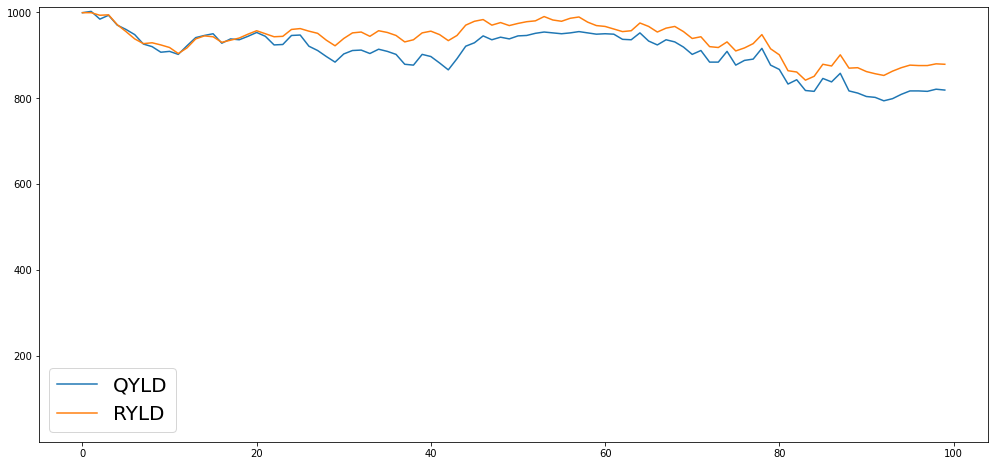

In [73]:
funds = ['QYLD', 'RYLD']

plt.rc('legend',fontsize=20)

plt.figure(figsize=(17,8))
for f in funds:
    plt.plot(df[f].values, label=f)
plt.legend()
plt.ylim(0.8)
plt.show()
#plt.savefig('tom.png')
plt.close()

In [23]:
# Calculate annualized return
numYears = len(df)/12

In [28]:
np.power(1.25, numYears)

1.4237733313744956

In [109]:
def getRate(initVal, finalVal, numDays):
    numYears = numDays/365
    return 1+npf.rate(nper=numYears, pmt=0, pv=-initVal, fv=finalVal)

In [110]:
def calcDays(start, end):
    delta = end-start
    return delta.to_pytimedelta().days

In [121]:
for f in fundList:
    initVal = df.iloc[0][f]
    finalVal = df.iloc[-1][f]
    start = pd.to_datetime(df.index[0])
    end = pd.to_datetime(df.index[-1])
    numDays = calcDays(start, end)
    annualRate = getRate(initVal, finalVal, numDays)
    print("{}: {:.5}".format(f, annualRate))

ARKK: nan
QYLD: 0.60224
COMB: 1.9856
JEPI: 0.80812
CCJ: 1.1688
NUSI: 0.58954
RYLD: 0.72135
SPY: 0.70911


143

In [37]:
df.corr()

,ARKK,QYLD,COMB,JEPI,CCJ,NUSI,RYLD,SPY
ARKK,1.000000,0.890049,-0.789911,0.793033,-0.151120,0.968134,0.788714,0.911284
QYLD,0.890049,1.000000,-0.553373,0.936090,0.183289,0.812460,0.929287,0.959044
COMB,-0.789911,-0.553373,1.000000,-0.407418,0.646526,-0.857530,-0.341623,-0.557353
JEPI,0.793033,0.936090,-0.407418,1.000000,0.330936,0.704489,0.897860,0.951910
CCJ,-0.151120,0.183289,0.646526,0.330936,1.000000,-0.303283,0.408389,0.157889
NUSI,0.968134,0.812460,-0.857530,0.704489,-0.303283,1.000000,0.688670,0.846498
RYLD,0.788714,0.929287,-0.341623,0.897860,0.408389,0.688670,1.000000,0.900480
SPY,0.911284,0.959044,-0.557353,0.951910,0.157889,0.846498,0.900480,1.000000
